<a href="https://colab.research.google.com/github/AmeenUrRehman/ML-Project2/blob/up-pages/Predict_Whether_Person_has_a_Chronic_Disease_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Predict Whether the Person has a Chronic Disease or not***

In [83]:
#First we have to Perform DataPreProcessing and Prepare your Data for Analysis and Modelling purpose as well.
#Step1 Import Libraries which will be use in Data analyzation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('/content/kidney_disease.csv')
df.head()
#1. Features:
# id -id
# age -age
# bp -blood pressure
# sg -specific gravity
# al -albumin
# su -sugar
# rbc -red blood cells
# pc - pus cell
# pcc -pus cell clumps
# ba -bacteria
# bgr -blood glucose random
# bu -blood urea
# sc -serum creatinine
# sod -sodium
# pot -potassium
# hemo -haemoglobin
# pcv -packed cell volume
# wc -white blood cell count
# rc -red blood cell count
# htn -ypertension
# dm -diabetes mellitus
# cad -coronary artery disease
# appet -appetite
# pe -pedal edema
# ane -anemia
# classification -class
#We have to change Columns name to the above withrespect to them

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [85]:
column  =  pd.read_csv('/content/data_description.txt',sep='-')
column  = column.reset_index()

In [86]:
column.columns = ['cols' , 'abb_col_names']
column

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [87]:
df.columns = column['abb_col_names'].values

In [88]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [89]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [90]:
def convert_dtypes(df , feature):
  df[feature] = pd.to_numeric(df[feature] , errors='coerce') #Coerce means if Nan value comes in handle it by own


In [91]:
features = ['packed cell volume','white blood cell count','red blood cell count']
for feature in features:
  convert_dtypes(df,feature)

In [92]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [93]:
df.drop('id' , axis=1  , inplace=True)

In [94]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [95]:
#Applying Data Cleaning techniques on Data and clean our Data.

In [96]:
def extract_cat_num(df):
  cat_col = [col for col in df.columns if df[col].dtypes == 'object']
  num_col = [col for col in df.columns if df[col].dtypes != 'object']
  return cat_col , num_col

In [97]:
cat_col , num_col = extract_cat_num(df)

In [98]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [99]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [100]:
for col in cat_col:
  print('{} has values {}'.format(col , df[col].unique()))
  print('\n')

red blood cells has values [nan 'normal' 'abnormal']


 pus cell has values ['normal' 'abnormal' nan]


pus cell clumps has values ['notpresent' 'present' nan]


bacteria has values ['notpresent' 'present' nan]


ypertension has values ['yes' 'no' nan]


diabetes mellitus has values ['yes' 'no' ' yes' '\tno' '\tyes' nan]


coronary artery disease has values ['no' 'yes' '\tno' nan]


appetite has values ['good' 'poor' nan]


pedal edema has values ['no' 'yes' nan]


anemia has values ['no' 'yes' nan]


class has values ['ckd' 'ckd\t' 'notckd']




The above data Contains some dirtiness like {'\tno' , '\yes'} so we have to clean it 

In [101]:
df['diabetes mellitus'].replace(to_replace = {'\tno':'no' ,'\tyes':'yes'} ,inplace= True)
df['coronary artery disease'].replace(to_replace = '\tno' , value = 'no'  , inplace = True)
df['class'].replace(to_replace= 'ckd\t' , value= 'ckd' , inplace = True)

In [102]:
for col in cat_col:
  print('{} has values {}'.format(col , df[col].unique()))
  print('\n')

red blood cells has values [nan 'normal' 'abnormal']


 pus cell has values ['normal' 'abnormal' nan]


pus cell clumps has values ['notpresent' 'present' nan]


bacteria has values ['notpresent' 'present' nan]


ypertension has values ['yes' 'no' nan]


diabetes mellitus has values ['yes' 'no' ' yes' nan]


coronary artery disease has values ['no' 'yes' nan]


appetite has values ['good' 'poor' nan]


pedal edema has values ['no' 'yes' nan]


anemia has values ['no' 'yes' nan]


class has values ['ckd' 'notckd']




In [103]:
len(num_col)

14

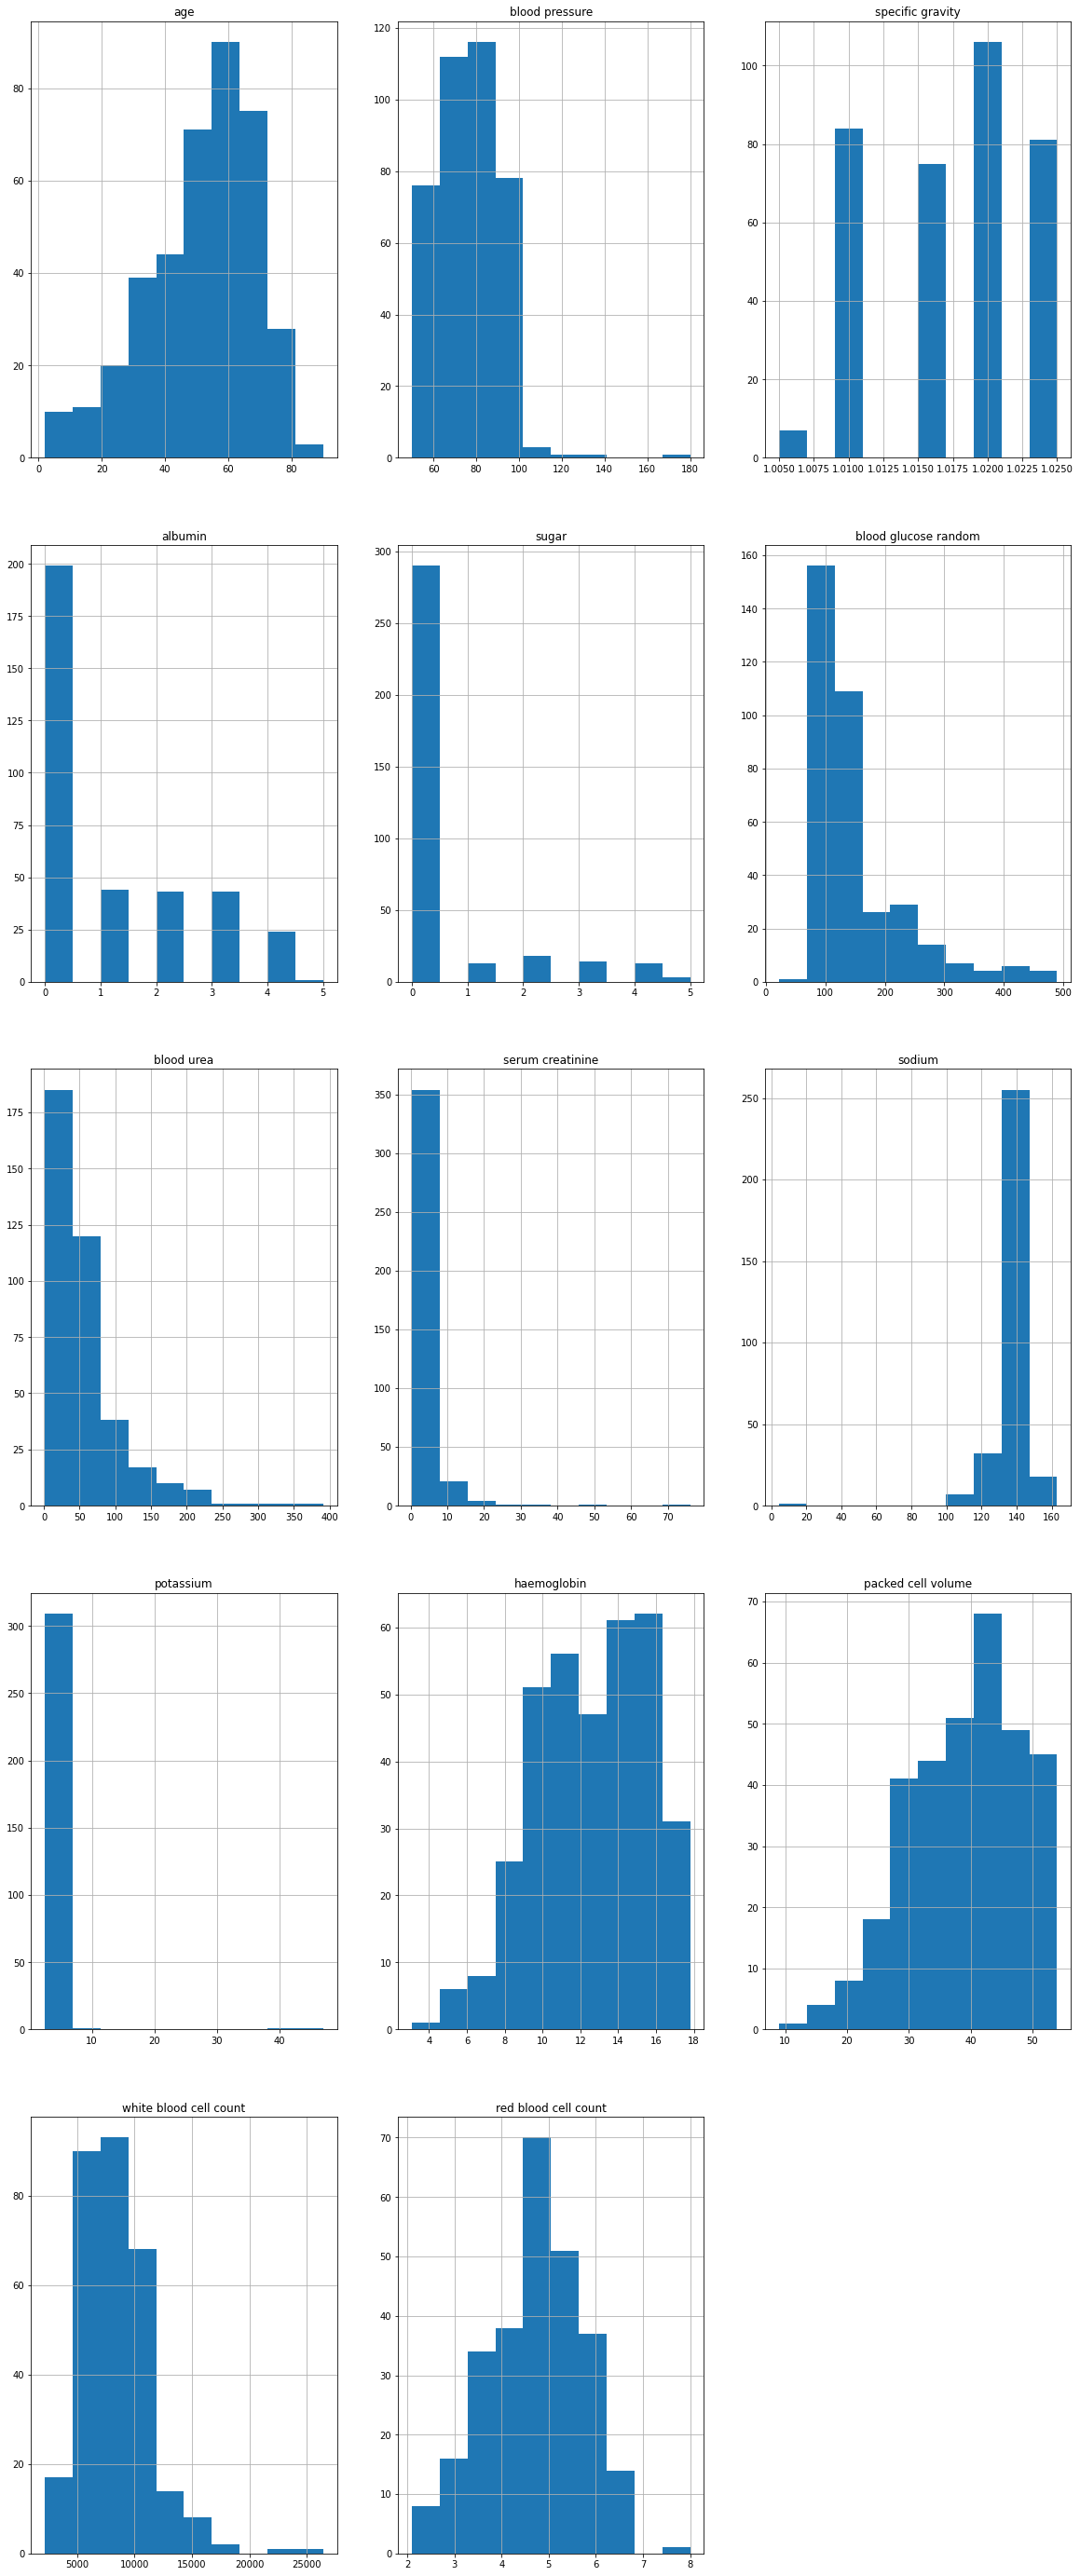

In [104]:
plt.figure(figsize=(20,50))
for i,feature in enumerate(num_col):
  plt.subplot(5,3,i+1)
  df[feature].hist()
  plt.title(feature)

In [105]:
len(cat_col)

11

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

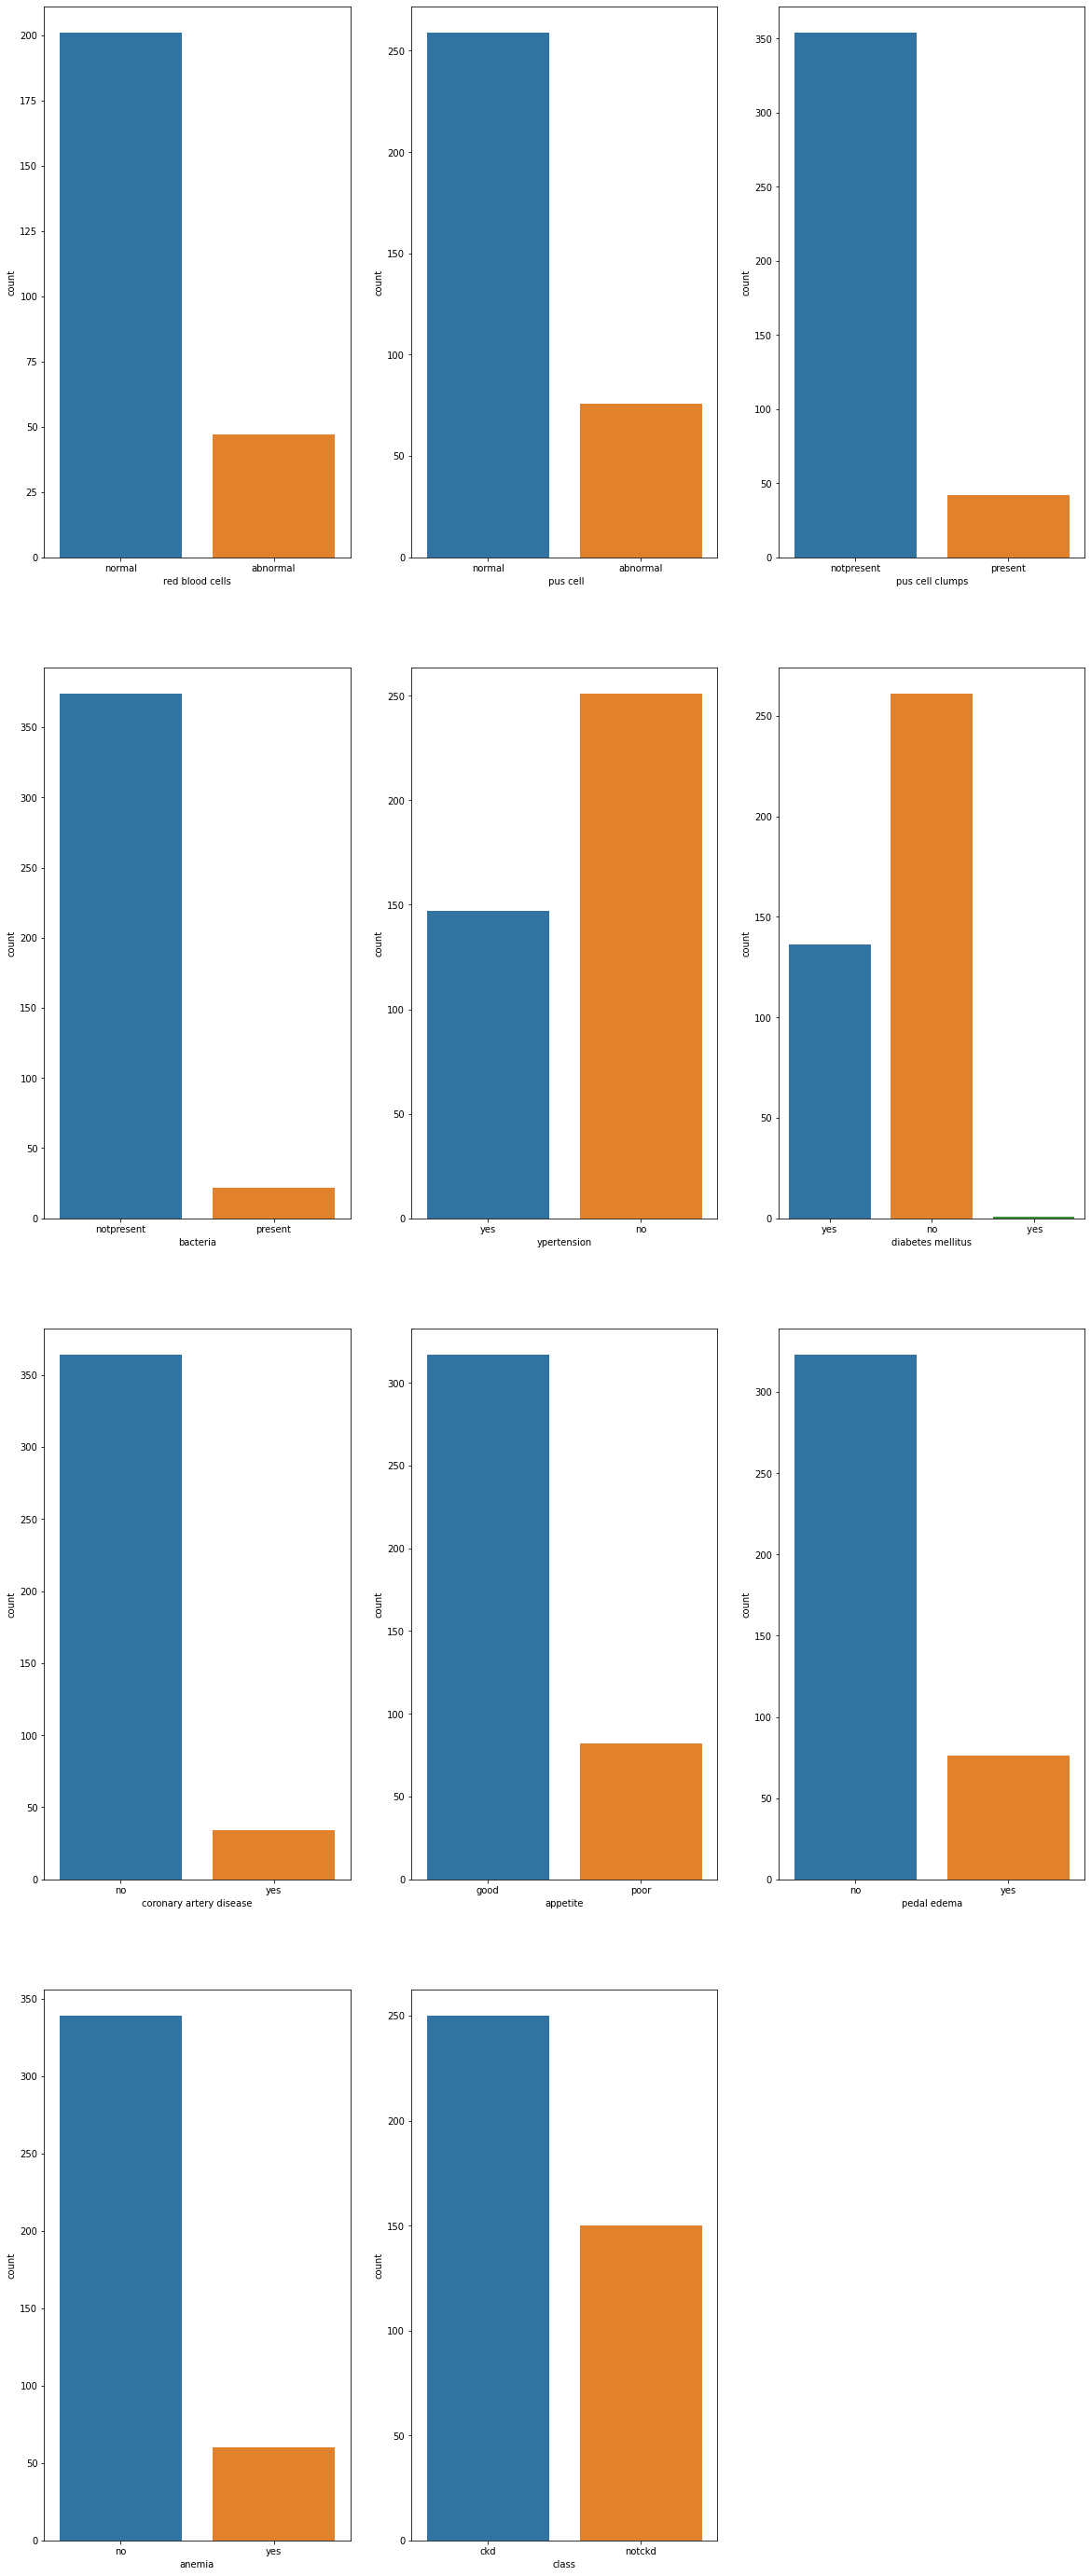

In [106]:
plt.figure(figsize=(20,50))
for i,feature in enumerate(cat_col):
  plt.subplot(4,3, i+1)
  sns.countplot(df[feature])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



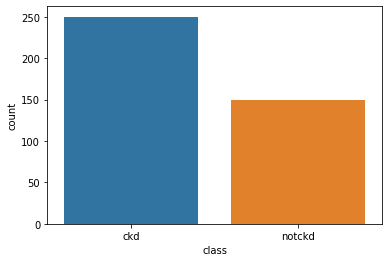

In [107]:
 sns.countplot(df['class'])

In [108]:
df.corr()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood glucose random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


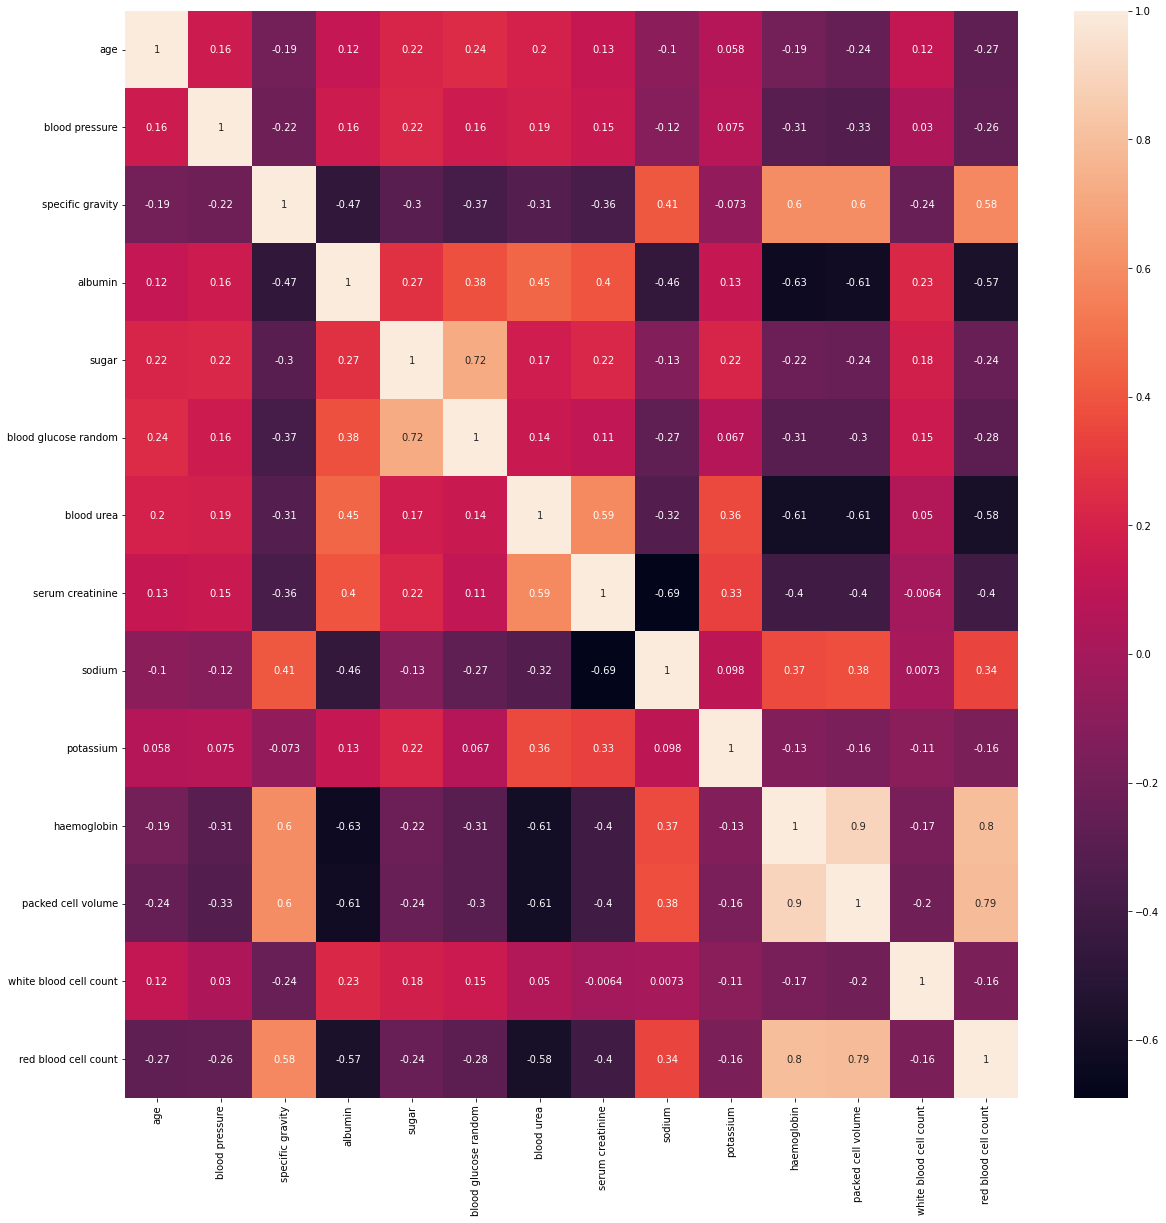

In [109]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [110]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min' ,'max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

Now we are try to Analyzing the Data

In [111]:
pip install plotly

In [112]:
import plotly.express as px
px.violin(df,y= 'red blood cell count' ,x= 'class' , color = 'class')

In [113]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [114]:
px.scatter(df,x ='haemoglobin',y='packed cell volume')

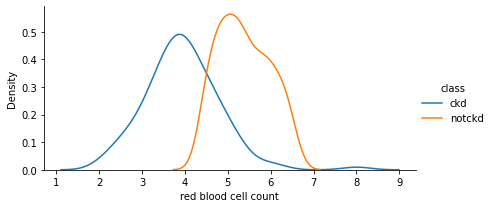

In [115]:
grid = sns.FacetGrid(df,hue='class' , aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

In [116]:
def violin(col):
  fig = px.violin(df, x = 'class' , y=col , color='class' , box=True)
  return fig.show()

In [117]:
def scatters(col1,col2):
  fig = px.scatter(df,x=col1,y=col2,color='class')
  return fig.show()

In [118]:
def kde_plot(feature):
  grid = sns.FacetGrid(df,hue='class' , aspect=2)
  grid.map(sns.kdeplot,feature)
  grid.add_legend()


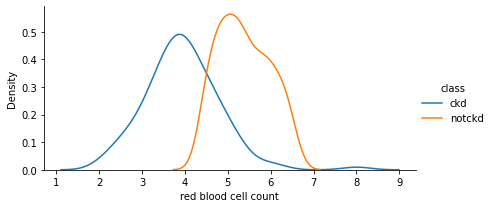

In [119]:
kde_plot('red blood cell count')

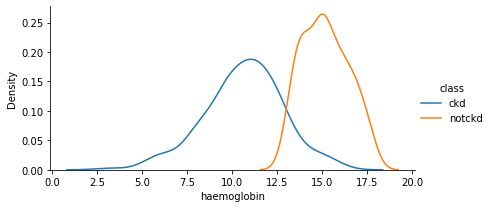

In [120]:
kde_plot('haemoglobin')

In [121]:
scatters('red blood cell count', 'packed cell volume')

In [122]:
violin('packed cell volume')

In [123]:
scatters('red blood cell count', 'albumin')

In [124]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

In [125]:
data = df.copy()

In [126]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [127]:
random_sample = data['red blood cells'].dropna().sample(152)
random_sample

386      normal
11     abnormal
313      normal
336      normal
279      normal
         ...   
258      normal
149    abnormal
100    abnormal
374      normal
356      normal
Name: red blood cells, Length: 152, dtype: object

In [128]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [129]:
random_sample.index

Int64Index([386,  11, 313, 336, 279, 314, 343, 229, 153, 308,
            ...
            377, 289,  34, 274, 285, 258, 149, 100, 374, 356],
           dtype='int64', length=152)

In [130]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [131]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [132]:
data.loc[data['red blood cells'].isnull(),'red blood cells'] = random_sample

In [133]:
data['red blood cells'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



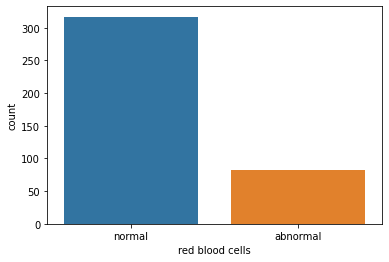

In [134]:
sns.countplot(data['red blood cells'])

In [135]:
def Random_value_imputation(feature):
  random_sample = data[feature].dropna().sample(data[feature].isnull().sum())
  random_sample.index=data[data[feature].isnull()].index
  data.loc[data[feature].isnull(),feature] = random_sample
  

In [136]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [137]:
for col in num_col:
  Random_value_imputation(col)

In [138]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [139]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [140]:
for col in cat_col:
  Random_value_imputation(col)

In [141]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [142]:
data['pus cell clumps'].mode()[0]

'notpresent'

In [143]:
def impute_mode(feature):
  mode = data[feature].mode()[0]
  data[feature] = data[feature].fillna(mode)

In [144]:
for col in cat_col:
  impute_mode(col)

In [145]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [146]:
#Machine understand in numeric or array form so we have to change all cat_col values in numeric form

In [147]:
for col in cat_col:
  print('{} has {} categories'.format(col,data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [148]:
#Label Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [150]:
for col in cat_col:
  data[col] = le.fit_transform(data[col])

In [151]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,141.0,4.9,15.4,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,144.0,18.0,0.8,131.0,4.1,11.3,38.0,6000.0,5.7,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,140.0,3.9,9.6,31.0,7500.0,5.2,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,137.0,4.7,11.6,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [152]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [153]:
ind_col = [col for col in data.columns if col!='class']
dep_col = 'class'

In [154]:
X = data[ind_col]
y = data[dep_col]

In [155]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [156]:
ordered_rank_feature = SelectKBest(score_func=chi2 ,k=20)
ordered_feature= ordered_rank_feature.fit(X,y)

In [157]:
ordered_feature.scores_

array([1.19463856e+02, 8.80861826e+01, 5.59682922e-03, 2.39041728e+02,
       9.64257028e+01, 1.14172450e+01, 1.26578778e+01, 2.52000000e+01,
       1.32000000e+01, 2.42493882e+03, 2.49659866e+03, 3.49340417e+02,
       2.43765042e+01, 2.46154431e+00, 1.22289154e+02, 3.29584007e+02,
       1.69926234e+04, 1.96139679e+01, 8.82000000e+01, 1.99004975e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [158]:
datascores = pd.DataFrame(ordered_feature.scores_ , columns=['Score'])
datascores

,Score
0,119.463856
1,88.086183
2,0.005597
3,239.041728
4,96.425703
5,11.417245
6,12.657878
7,25.200000
8,13.200000
9,2424.938820


In [159]:
dfcol = pd.DataFrame(X.columns)
dfcol

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [160]:
features_rank = pd.concat([dfcol , datascores], axis=1)
features_rank

,0,Score
0,age,119.463856
1,blood pressure,88.086183
2,specific gravity,0.005597
3,albumin,239.041728
4,sugar,96.425703
5,red blood cells,11.417245
6,pus cell,12.657878
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2424.938820


In [161]:
features_rank.columns = ['features' , 'Score']
features_rank

,features,Score
0,age,119.463856
1,blood pressure,88.086183
2,specific gravity,0.005597
3,albumin,239.041728
4,sugar,96.425703
5,red blood cells,11.417245
6,pus cell,12.657878
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2424.938820


In [162]:
features_rank.nlargest(10,'Score')

,features,Score
16,white blood cell count,16992.623363
10,blood urea,2496.598659
9,blood glucose random,2424.938820
11,serum creatinine,349.340417
15,packed cell volume,329.584007
3,albumin,239.041728
14,haemoglobin,122.289154
0,age,119.463856
4,sugar,96.425703
18,ypertension,88.200000


In [163]:
selected_columns = features_rank.nlargest(10,'Score')['features'].values
selected_columns # These are your independent models

array(['white blood cell count', 'blood urea', 'blood glucose random',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [165]:
X_new = data[selected_columns]
X_new.head()

,white blood cell count,blood urea,blood glucose random,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,144.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [166]:
len(X_new)

400

In [168]:
X_new.shape

(400, 10)

In [169]:
from sklearn.model_selection import train_test_split

In [174]:
X_train ,X_test , y_train, y_test  = train_test_split(X_new, y , random_state=0, test_size=0.25)

In [175]:
print(X_train.shape)

(300, 10)


In [176]:
print(X_test.shape)

(100, 10)


In [182]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [183]:
pip install xgBoost

In [184]:
from xgboost import XGBClassifier

In [185]:
XGBClassifier()

XGBClassifier()

In [197]:
params = {
    'learning_rate': [0.05 , 0.20 , 0.25],
    'max_depth' : [5,8,10], 
    'min_child_width' : [1,3,5,7],
    'gamma' : [0.0, 0.1 ,0.2, 0.4],
    'colsample_bytree' : [0.3,0.4,0.7]  
}

In [198]:
from sklearn.model_selection import RandomizedSearchCV

In [199]:
classifier = XGBClassifier()

In [200]:
random_search = RandomizedSearchCV(classifier,param_distributions=params , n_iter=5 , scoring='roc_auc' , n_jobs=-1 , cv=5 , verbose=3) 

In [201]:
random_search.fit(X_train ,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_width': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [203]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8,
              min_child_width=3)

In [204]:
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_width': 3}

In [205]:
classifier = XGBClassifier(colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8,
              min_child_width=3)

In [206]:
classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8,
              min_child_width=3)

In [209]:
y_pred = classifier.predict(X_test)

In [210]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [211]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [212]:
confusion_matrix(y_test, y_pred)

array([[60,  2],
       [ 0, 38]])

In [216]:
accuracy_score( y_test,y_pred)

0.98